<a href="https://colab.research.google.com/github/vtsimoes/class_victor_dataset/blob/main/A_Pre_process_VICTOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pré-processamento dos dados do DATASET VICTOR


In [ ]:
#Load required libraries
import os
import numpy as np
import pandas as pd
import nltk
import re
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('rslp')
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib import pylab
import time
import pickle
from google.colab import drive
import string
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import random

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


Funções para salvar os dados pré-processados

In [ ]:
def save_pickle(data_to_save,path='',filename='file.pkl'):
  open_file = open(path + filename, "wb")
  pickle.dump(data_to_save, open_file)
  open_file.close()

def load_pickle(path='',filename='file.pkl'):
  open_file = open(path + filename, "rb")
  pkl_file = pickle.load(open_file)
  open_file.close()
  return pkl_file

In [ ]:
path = 'drive/MyDrive/Mestrado/Datasets/VICTOR/'
path_dados = 'drive/MyDrive/MestradoTucurui/Experiments/Dados/'
path_preprocessados = 'Pre-processados/'
#Montando o google drive para obter os dados
drive.mount('/content/drive/')

Mounted at /content/drive/


Carregamento do DATASET VICTOR

In [ ]:
filename_test = "test_small.csv"
filename_train = "train_small.csv"
filename_validation = "validation_small.csv"

In [ ]:
train = pd.read_csv(path+'small/'+filename_train)
valid = pd.read_csv(path+'small/'+ filename_validation)
test = pd.read_csv(path+'small/'+filename_test)

In [ ]:
test.loc[test.body.str.contains('LEI_')]

,themes,process_id,file_name,document_type,pages,body
35,[409],AI_859014,AI_859014_2811603_50_16052013.pdf,outros,3,"{""colendo supremo tribunal federal senhores mi..."
36,[409],AI_859014,AI_859014_2811603_50_16052013.pdf,outros,4,"{""conceder ofício a requerimento interessado m..."
37,[409],AI_859014,AI_859014_2811603_50_16052013.pdf,outros,5,"{""seja reafirmada jurisprudência consolidada s..."
38,[409],AI_859014,AI_859014_2811603_50_16052013.pdf,outros,6,"{""cabimento recurso extraordinário recurso ext..."
40,[409],AI_859014,AI_859014_2811603_50_16052013.pdf,outros,8,"{""vantagens concedidas aos servidores atividad..."
...,...,...,...,...,...,...
95505,"[330, 729]",RE_1131469,RE_1131469_314320020_95_10052018.pdf,outros,2,"{""página separação gerada automaticamente pelo..."
95506,"[330, 729]",RE_1131469,RE_1131469_314320020_95_10052018.pdf,outros,3,"{""página separação gerada automaticamente pelo..."
95511,"[330, 729]",RE_1131469,RE_1131469_314520902_80_04062018.pdf,outros,1,"{""nº comunicação eletrônica ordem secretaria j..."
95512,"[555, 810]",RE_980600,RE_980600_309953145_95_11072016.pdf,outros,1,"{""supremo tribunal federal secretaria judiciár..."


In [ ]:
test.loc[(test.file_name == 'AI_859014_2811603_50_16052013.pdf') & (test.pages == 3)].body.values

array(['{"colendo supremo tribunal federal senhores ministros razões recursais síntese decisão recorrida trata de decisão presidente turma recursal dos juizados especiais seção judiciária estado paraíba que negou seguimento recurso extraordinário união nos seguintes termos decisão cuida de recurso extraordinário interposto contra acórdão deste órgão colegiado que rejeitou alegação prescrição negou seguimento recurso ente público mantendo sentença recorrida por seus próprios fundamentos eis que calçada posicionamento reiterado supremo tribunal federal dispõe LEI_10259 que instituiu juizados especiais federais cíveis criminais âmbito justiça federal ARTIGO_14 caberá pedido uniformização interpretação lei federal quando houver divergência entre decisões sobre questões direito material proferidas por turmas recursais interpretação LEI_4º quando orientação acolhida pela turma uniformização questões direito material contrariar súmula jurisprudência dominante superior tribunal justiça stj par

In [ ]:
df_est_basica = pd.DataFrame({'Classe':['Acórdão','ARE','Despacho','Outros','RE','Sentença'],'Treino':[301,2070,265,38585,453,420],'Validação':[201,237,147,25898,326,284],'Teste':[199,213,147,25744,312,265]})

In [ ]:
df_est_basica.head()

,Classe,Treino,Validação,Teste
0,Acórdão,301,201,199
1,ARE,2070,237,213
2,Despacho,265,147,147
3,Outros,38585,25898,25744
4,RE,453,326,312


\begin{table}[]
\centering
\begin{tabular}{@{}c|cl|cl|cl|@{}}
\textbf{Classe} & \multicolumn{2}{c|}{\textbf{Treino}} & \multicolumn{2}{c|}{\textbf{Validação}} & \multicolumn{2}{c|}{\textbf{Teste}} \\ \midrule
Acórdão        & \multicolumn{1}{c|}{301}    & 0,72%  & \multicolumn{1}{c|}{201}    & 0,75%  & \multicolumn{1}{c|}{199}    & 0,75%  \\ \midrule
ARE            & \multicolumn{1}{c|}{2070}   & 4,97%  & \multicolumn{1}{c|}{237}    & 0,88%  & \multicolumn{1}{c|}{213}    & 0,80   \\ \midrule
Despacho       & \multicolumn{1}{c|}{265}    & 0,64%  & \multicolumn{1}{c|}{147}    & 0,55%  & \multicolumn{1}{c|}{147}    & 0,55%  \\ \midrule
Outros         & \multicolumn{1}{c|}{38.585} & 92,58% & \multicolumn{1}{c|}{25.898} & 96,60% & \multicolumn{1}{c|}{25.744} & 96,73% \\ \midrule
RE             & \multicolumn{1}{c|}{453}    & 1,09%  & \multicolumn{1}{c|}{326}    & 1,22%  & \multicolumn{1}{c|}{312}    & 1,17%  \\ \midrule
\textbf{Total} & \multicolumn{1}{l}{41.674}  & 100 %  & \multicolumn{1}{l}{26.809}  & 100%   & \multicolumn{1}{l}{26.615}  & 100%
\end{tabular}
\end{table}

## Pré-processamento para remoção de vazios, e tokens desnecessários

###Removendo "{}" do campo de textos

In [ ]:
def strip_trash(df, column="body"):
    df[column] = df[column].str.strip('{}"')
    return df

In [ ]:
train_clean = strip_trash(train)
valid_clean = strip_trash(valid)
test_clean = strip_trash(test)

In [ ]:
del(train)
del(valid)
del(test)

In [ ]:
!python -m spacy download pt_core_news_md

2023-08-21 18:50:42.395782: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 MB 13.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_md')


In [ ]:
import spacy
nlp = spacy.load("pt_core_news_md")

In [ ]:
def preProcessData(df,remove_stopwords=True,lemma = False):
  docs = []
  labels = []
  file_name = []
  pages = []
  trunked = []
  stops = ['fls.','fls','fl.','fl','pg.','pg']
  if remove_stopwords:
    stop_words = set(stopwords.words('portuguese'))
    for stop in stops:
      stop_words.add(stop)
  else:
    print('Sem remoção de stopwords')
    stop_words = set(stops)
  #padrão para remoção de links
  for i, row in df.iterrows():
    labels.append(row.document_type)
    file_name.append(row.file_name)
    pages.append(row.pages)
    doc = re.sub(r"http\S+", "", row.body) #remove links
    if lemma:
      lemmatize = nlp(doc)
      tokens = []
      for token in lemmatize:
        tokens.append(token)
      doc = ' '.join([token.lemma_ for token in tokens])

    docs.append(doc)

  se_doc = pd.Series(data=docs)
  df_doc = pd.DataFrame(data=se_doc,columns=['body'])
  df_doc['document_type'] = labels
  df_doc['file_name'] = file_name
  df_doc['pages'] = pages
  df_doc['body'] = df_doc['body'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
  return df_doc

In [ ]:
df_train_processed = preProcessData(train_clean,remove_stopwords=True, lemma= True)
del(train_clean)
df_test_processed = preProcessData(test_clean,remove_stopwords=True, lemma= True)
del(test_clean)
df_valid_processed = preProcessData(valid_clean,remove_stopwords=True, lemma= True)
del(valid_clean)

In [ ]:
df_train_processed.body[0:10]

0    tribunal Justiça Estado bahia poder judiciário...
1    excelentíssimo senhor doutor juiz direito juiz...
2    razão recurso inominar recorrente atlantico fu...
3    empresa recorrente tornar credora débito nome ...
4    entretanto verdade parter apelante tornar titu...
5    crédito título oneroso dois empresário parte r...
6    assim claro abalo moral suportar parte recorri...
7    considerar existência negativação parte recorr...
8    normalidade interfirar intensamente comportame...
9    efeito propor ação indenização dano moral mate...
Name: body, dtype: object

In [ ]:
def quantidades(df):
  print(df.document_type.value_counts(), df.document_type.value_counts()/len(df))

###Removendo dados vazios

In [ ]:
df_train_proc_sem_vazio =  df_train_processed.loc[df_train_processed.body.str.len() != 0]
del(df_train_processed)
df_test_proc_sem_vazio =  df_test_processed.loc[df_test_processed.body.str.len() != 0]
del(df_test_processed)
df_valid_proc_sem_vazio =  df_valid_processed.loc[df_valid_processed.body.str.len() != 0]
del(df_valid_processed)

In [ ]:
quantidades(df_train_proc_sem_vazio)

outros                              134049
peticao_do_RE                         9509
agravo_em_recurso_extraordinario      2543
sentenca                              2129
acordao_de_2_instancia                 553
despacho_de_admissibilidade            346
Name: document_type, dtype: int64 outros                              0.898879
peticao_do_RE                       0.063764
agravo_em_recurso_extraordinario    0.017052
sentenca                            0.014276
acordao_de_2_instancia              0.003708
despacho_de_admissibilidade         0.002320
Name: document_type, dtype: float64


In [ ]:
quantidades(df_test_proc_sem_vazio)

outros                              85387
peticao_do_RE                        6331
agravo_em_recurso_extraordinario     1837
sentenca                             1475
acordao_de_2_instancia                273
despacho_de_admissibilidade           198
Name: document_type, dtype: int64 outros                              0.894095
peticao_do_RE                       0.066292
agravo_em_recurso_extraordinario    0.019235
sentenca                            0.015445
acordao_de_2_instancia              0.002859
despacho_de_admissibilidade         0.002073
Name: document_type, dtype: float64


In [ ]:
quantidades(df_valid_proc_sem_vazio)

outros                              84049
peticao_do_RE                        6360
agravo_em_recurso_extraordinario     2139
sentenca                             1636
acordao_de_2_instancia                299
despacho_de_admissibilidade           183
Name: document_type, dtype: int64 outros                              0.887848
peticao_do_RE                       0.067184
agravo_em_recurso_extraordinario    0.022595
sentenca                            0.017282
acordao_de_2_instancia              0.003158
despacho_de_admissibilidade         0.001933
Name: document_type, dtype: float64


Salvando os dados pré-processados

In [ ]:
save_pickle(df_train_proc_sem_vazio,path=path_dados+path_preprocessados,filename='train_processed_per_page_sw_lemma.pkl')
save_pickle(df_valid_proc_sem_vazio,path=path_dados+path_preprocessados,filename='valid_processed_per_page_sw_lemma.pkl')
save_pickle(df_test_proc_sem_vazio,path=path_dados+path_preprocessados,filename='test_processed_per_page_sw_lemma.pkl')

Carregando os documentos pré-processados e sem as páginas unidas

In [ ]:
test = load_pickle(path=path_dados+path_preprocessados,filename='test_processed_per_page_sw_lemma.pkl')

In [ ]:
test.loc[(test.file_name == 'AI_859014_2811603_50_16052013.pdf') & (test.pages == 3)].body.values

array(['coler Supremo tribunal federal senhor ministro razão recursal síntese decisão recorrir tratar decisão presidente turma recursal juizado especial seção judiciário estado paraíba negar seguimento recurso extraordinário união seguinte termo decisão cuidar recurso extraordinário interposto contra acórdão órgão colegiado rejeitar alegação prescrição negar seguimento recurso ente público manter sentença recorrir próprio fundamento eis calçada posicionamento reiterar Supremo tribunal federal dispor LEI_10259 instituir juizado especial federal cível criminal âmbitor justiça federal ARTIGO_14 caber pedir uniformização interpretação lei federal divergência decisão sobre questão direito material proferir turma recursal interpretação LEI_4º orientação acolhir turma uniformização questão direito material contrariar súmula jurisprudência dominante alto tribunal Justiça stj parte interessado poder provocar manifestação dirimir divergência caso presente plausibilidade direito invocar fundar re



*  Texto Original



"colendo supremo tribunal federal senhores ministros razões recursais síntese decisão recorrida trata de decisão presidente turma recursal dos juizados especiais seção judiciária estado paraíba que negou seguimento recurso extraordinário união nos seguintes termos decisão cuida de recurso extraordinário interposto contra acórdão deste órgão colegiado que rejeitou alegação prescrição negou seguimento recurso ente público mantendo sentença recorrida por seus próprios fundamentos eis que calçada posicionamento reiterado supremo tribunal federal dispõe LEI_10259 que instituiu juizados especiais federais cíveis criminais âmbito justiça federal ARTIGO_14 caberá pedido uniformização interpretação lei federal quando houver divergência entre decisões sobre questões direito material proferidas por turmas recursais interpretação LEI_4º quando orientação acolhida pela turma uniformização questões direito material contrariar súmula jurisprudência dominante superior tribunal justiça stj parte interessada poderá provocar manifestação deste que dirimirá divergência caso presente plausibilidade direito invocado havendo fundado receio dano difícil reparação poderá relator"



*   Texto Após pré-processamento

'coler Supremo tribunal federal senhor ministro razão recursal síntese decisão recorrir tratar decisão presidente turma recursal juizado especial seção judiciário estado paraíba negar seguimento recurso extraordinário união seguinte termo decisão cuidar recurso extraordinário interposto contra acórdão órgão colegiado rejeitar alegação prescrição negar seguimento recurso ente público manter sentença recorrir próprio fundamento eis calçada posicionamento reiterar Supremo tribunal federal dispor LEI_10259 instituir juizado especial federal cível criminal âmbitor justiça federal ARTIGO_14 caber pedir uniformização interpretação lei federal divergência decisão sobre questão direito material proferir turma recursal interpretação LEI_4º orientação acolhir turma uniformização questão direito material contrariar súmula jurisprudência dominante alto tribunal Justiça stj parte interessado poder provocar manifestação dirimir divergência caso presente plausibilidade direito invocar fundar receio dano difícil reparação poder relator'



In [ ]:
df_train_proc_sem_vazio = load_pickle(path=path_dados+path_preprocessados,filename='train_processed_per_page.pkl')
df_valid_proc_sem_vazio = load_pickle(path=path_dados+path_preprocessados,filename='valid_processed_per_page.pkl')
df_test_proc_sem_vazio = load_pickle(path=path_dados+path_preprocessados,filename='test_processed_per_page.pkl')

##Juntando as páginas em um único documento

In [ ]:
df_train = df_train_proc_sem_vazio
del(df_train_proc_sem_vazio)
df_valid = df_valid_proc_sem_vazio
del(df_valid_proc_sem_vazio)
df_test = df_test_proc_sem_vazio
del(df_test_proc_sem_vazio)

In [ ]:
#Conjunto de treino
df_train['body'] = df_train['body'].astype('str')
documents_train = df_train.groupby(['file_name'])['body'].apply(lambda x: ' '.join(x))
doc_type = df_train.groupby(['file_name']).agg({'pages': 'last','document_type': 'last'})
documents_train = pd.concat([documents_train,doc_type],axis=1)
documents_train.reset_index(inplace=True)
del(df_train)

In [ ]:
#Conjunto de validacao
df_valid['body'] = df_valid['body'].astype('str')
documents_valid = df_valid.groupby(['file_name'])['body'].apply(lambda x: ' '.join(x))
doc_type = df_valid.groupby(['file_name']).agg({'pages': 'last','document_type': 'last'})
documents_valid = pd.concat([documents_valid,doc_type],axis=1)
documents_valid.reset_index(inplace=True)
del(df_valid)

In [ ]:
#Conjunto de testes
df_test['body'] = df_test['body'].astype('str')
documents_test = df_test.groupby(['file_name'])['body'].apply(lambda x: ' '.join(x))
doc_type = df_test.groupby(['file_name']).agg({'pages': 'last','document_type': 'last'})
documents_test = pd.concat([documents_test,doc_type],axis=1)
documents_test.reset_index(inplace=True)
del(df_test)
del(doc_type)

Mostrando as quantidades

In [ ]:
quantidades(documents_train)

outros                              37112
peticao_do_RE                         450
sentenca                              420
acordao_de_2_instancia                301
agravo_em_recurso_extraordinario      266
despacho_de_admissibilidade           265
Name: document_type, dtype: int64 outros                              0.956150
peticao_do_RE                       0.011594
sentenca                            0.010821
acordao_de_2_instancia              0.007755
agravo_em_recurso_extraordinario    0.006853
despacho_de_admissibilidade         0.006827
Name: document_type, dtype: float64


In [ ]:
quantidades(documents_valid)

outros                              24286
peticao_do_RE                         317
sentenca                              277
agravo_em_recurso_extraordinario      227
acordao_de_2_instancia                198
despacho_de_admissibilidade           143
Name: document_type, dtype: int64 outros                              0.954338
peticao_do_RE                       0.012457
sentenca                            0.010885
agravo_em_recurso_extraordinario    0.008920
acordao_de_2_instancia              0.007781
despacho_de_admissibilidade         0.005619
Name: document_type, dtype: float64


In [ ]:
quantidades(documents_test)

outros                              24191
peticao_do_RE                         301
sentenca                              262
agravo_em_recurso_extraordinario      203
acordao_de_2_instancia                197
despacho_de_admissibilidade           146
Name: document_type, dtype: int64 outros                              0.956166
peticao_do_RE                       0.011897
sentenca                            0.010356
agravo_em_recurso_extraordinario    0.008024
acordao_de_2_instancia              0.007787
despacho_de_admissibilidade         0.005771
Name: document_type, dtype: float64


Salvando documentos com as páginas unidas

In [ ]:
save_pickle(documents_train,path=path_dados+path_preprocessados,filename='train_processed_concat_pages_sw_lemma.pkl')
save_pickle(documents_test,path=path_dados+path_preprocessados,filename='test_processed_concat_pages_sw_lemma.pkl')
save_pickle(documents_valid,path=path_dados+path_preprocessados,filename='valid_processed_concat_pages_lemma_sw.pkl')

In [ ]:
df_train_proc_concat = load_pickle(path=path_dados+path_preprocessados,filename='train_processed_concat_pages.pkl')
df_valid_proc_concat = load_pickle(path=path_dados+path_preprocessados,filename='valid_processed_concat_pages.pkl')
df_test_proc_concat = load_pickle(path=path_dados+path_preprocessados,filename='test_processed_concat_pages.pkl')

In [ ]:
from IPython.display import display, Audio
import time
import urllib.request
urllib.request.urlretrieve("https://www.soundjay.com/buttons/sounds/button-2.mp3", "beep.mp3")

def beep():
  display(Audio("beep.mp3", autoplay=True))

In [ ]:
beep()

## UNDERSAMPLE (Não utilizado)

In [ ]:
def underSample(data,percent):
  doc_vecs = []
  labels = []
  #vecs = []
  outros = data.loc[data.document_type == 'outros']
  filename_outros = pd.Series(outros.file_name.unique())
  outros_under = filename_outros.sample(frac=percent,replace=False)
  outros_sampled = outros.loc[outros.file_name.isin(outros_under.values)]
  outros_pre = outros.loc[~outros.file_name.isin(outros_under.values)]
  #sem_outros = data.loc[data.document_type != 'outros']
  #df = pd.concat([sem_outros,outros_sampled])
  return outros_sampled, outros_pre

In [ ]:
def index_sample(data,percent):
  data_o = data.loc[data.document_type == 'outros']
  index_o = data_o.index.values
  sampled = random.sample(list(index_o),int(0.10*len(index_o)))
  return sampled

In [ ]:
sampled_train = index_sample(documents_train,0.10)
sampled_valid = index_sample(documents_valid,0.10)

In [ ]:
#salvando os índices das amostragens
save_pickle(sampled_train,path=path_dados+path_preprocessados,filename='index_train_O10.pkl')
save_pickle(sampled_valid,path=path_dados+path_preprocessados,filename='index_valid_O10.pkl')

# Estatísticas do DATASET

## Carregando os documentos separados por página e concatenados

In [ ]:
df_train_proc_sem_vazio = load_pickle(path=path_dados+path_preprocessados,filename='train_processed_per_page.pkl')
#df_valid_proc_sem_vazio = load_pickle(path=path_dados+path_preprocessados,filename='valid_processed_per_page.pkl')
#df_test_proc_sem_vazio = load_pickle(path=path_dados+path_preprocessados,filename='test_processed_per_page.pkl')

In [ ]:
df_train_proc_concat = load_pickle(path=path_dados+path_preprocessados,filename='train_processed_concat_pages.pkl')
#df_valid_proc_concat = load_pickle(path=path_dados+path_preprocessados,filename='valid_processed_concat_pages.pkl')
#df_test_proc_concat = load_pickle(path=path_dados+path_preprocessados,filename='test_processed_concat_pages.pkl')

In [ ]:
df_train_proc_concat_NO = df_train_proc_concat.loc[df_train_proc_concat.document_type != 'outros']
df_valid_proc_concat_NO = df_valid_proc_concat.loc[df_valid_proc_concat.document_type != 'outros']
df_test_proc_concat_NO = df_test_proc_concat.loc[df_test_proc_concat.document_type != 'outros']

In [ ]:
df_train_proc_sem_vazio.reset_index(drop=True,inplace=True)
df_train_proc_concat.reset_index(drop=True,inplace=True)

### Distribuição dos Documentos entre as classes e conjuntos de Treino

In [ ]:
df_train_proc_concat.document_type.value_counts().sum(), df_valid_proc_concat.document_type.value_counts().sum(), df_test_proc_concat.document_type.value_counts().sum()

38815

In [ ]:
def generate_df_resume(df_train,df_valid,df_test):
  df = pd.DataFrame({'Classe':df_train.document_type.value_counts().index,'Treino':df_train.document_type.value_counts().values,'Validação':df_valid.document_type.value_counts().values,
                          'Teste':df_test.document_type.value_counts().values})
  return df

In [ ]:
df_classes_index = df_classes.set_index('Classe')
df_classes_index

,Treino,Validação,Teste
Classe,,,
outros,37113,24286,24191
peticao_do_RE,450,317,301
sentenca,420,277,262
acordao_de_2_instancia,301,227,203
agravo_em_recurso_extraordinario,266,198,197
despacho_de_admissibilidade,265,143,146


In [ ]:
train_O100_data = [df_classes_index.loc['outros'].Treino, df_classes_index.loc[df_classes_index.index != 'outros'].Treino.sum() ]
train_O100_label = ['Outros','Demais Classes']
valid_O100_data = [df_classes_index.loc['outros']['Validação'], df_classes_index.loc[df_classes_index.index != 'outros']['Validação'].sum() ]
valid_O100_label = ['Outros','Demais Classes']
test_O100_data = [df_classes_index.loc['outros']['Teste'], df_classes_index.loc[df_classes_index.index != 'outros']['Teste'].sum() ]
test_O100_label = ['Outros','Demais Classes']
train_O100_data, valid_O100_data, test_O100_data

([37113, 1702], [24286, 1162], [24191, 1109])

In [ ]:
valid_O100_data = [df_classes_index.loc['outros']['Validação'], df_classes_index.loc[df_classes_index.index != 'outros']['Validação'].sum() ]
valid_O100_label = ['Outros','Demais Classes']
valid_O100_data

[24286, 1162]

In [ ]:
test_O100_data = [df_classes_index.loc['outros']['Teste'], df_classes_index.loc[df_classes_index.index != 'outros']['Teste'].sum() ]
test_O100_label = ['Outros','Demais Classes']
test_O100_data

[24191, 1109]

In [ ]:
def pie_plot(data,label,title):
  plt.gca().axis("equal")
  pie = plt.pie(data,labels=label, startangle=0, autopct='%.2f%%', pctdistance=0.7, radius=1,textprops={'fontsize': 12})
  labels=label
  plt.title(title, weight='bold', size=14)
  #plt.legend(pie[0],labels, loc="upper right", fontsize=9,
            #bbox_transform=plt.gcf().transFigure)
  plt.subplots_adjust(left=0.0, bottom=0.1, right=0.85)

  plt.show()
  plt.clf()
  plt.close()

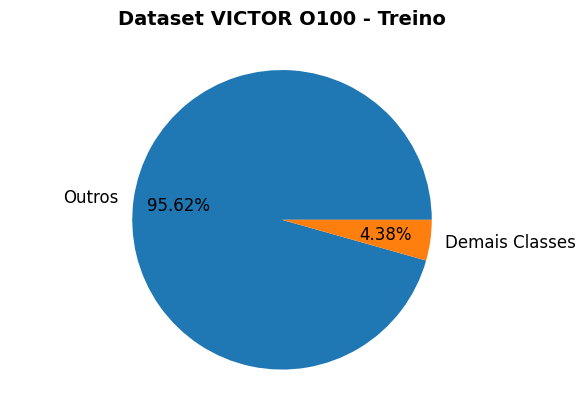

In [ ]:
pie_plot(train_O100_data,train_O100_label,'Dataset VICTOR O100 - Treino')

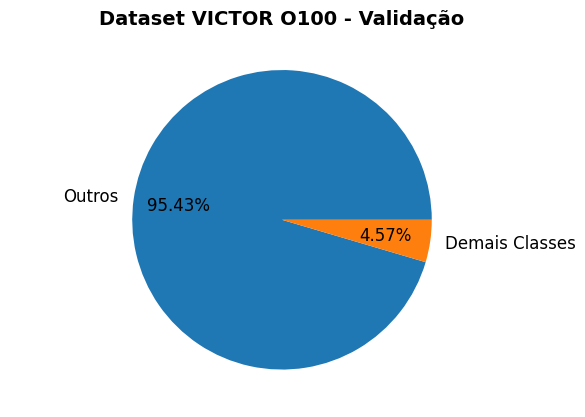

In [ ]:
pie_plot(valid_O100_data,valid_O100_label,'Dataset VICTOR O100 - Validação')

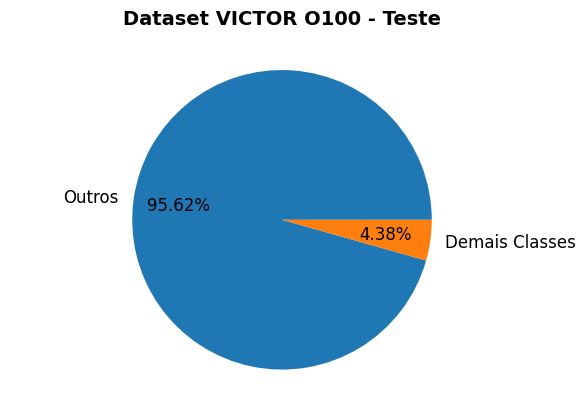

In [ ]:
pie_plot(test_O100_data,test_O100_label,'Dataset VICTOR O100 - Teste')

In [ ]:
df_classes_resume = generate_df_resume(df_train_proc_concat,df_valid_proc_concat,df_test_proc_concat)
df_classes_resume

,Classe,Treino,Validação,Teste
0,outros,37113,24286,24191
1,peticao_do_RE,450,317,301
2,sentenca,420,277,262
3,acordao_de_2_instancia,301,227,203
4,agravo_em_recurso_extraordinario,266,198,197
5,despacho_de_admissibilidade,265,143,146


In [ ]:
df_classes_NO = generate_df_resume(df_train_proc_concat_NO,df_valid_proc_concat_NO,df_test_proc_concat_NO)
df_classes_NO

,Classe,Treino,Validação,Teste
0,peticao_do_RE,450,317,301
1,sentenca,420,277,262
2,acordao_de_2_instancia,301,227,203
3,agravo_em_recurso_extraordinario,266,198,197
4,despacho_de_admissibilidade,265,143,146


In [ ]:
df_classes_NO.Classe

0                       peticao_do_RE
1                            sentenca
2              acordao_de_2_instancia
3    agravo_em_recurso_extraordinario
4         despacho_de_admissibilidade
Name: Classe, dtype: object

In [ ]:
labels = ['PRE','Sentença','Acórdão','ARE','Despacho']

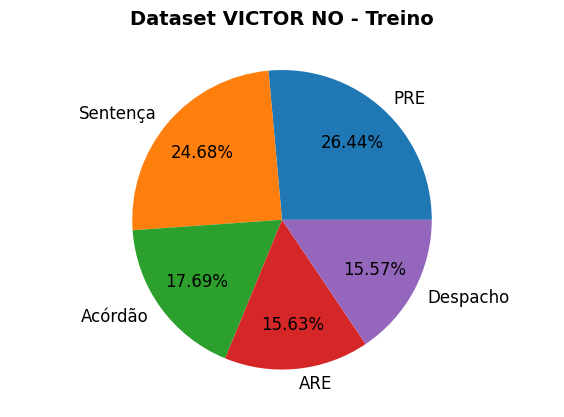

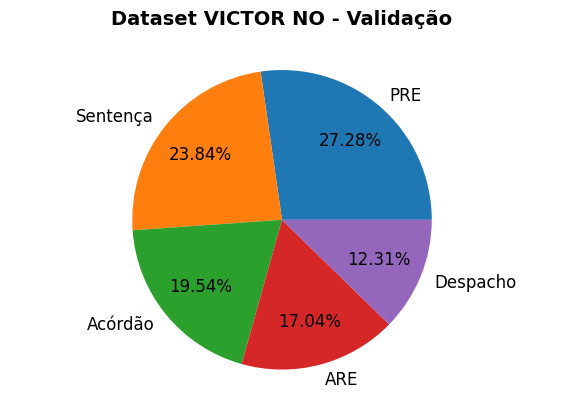

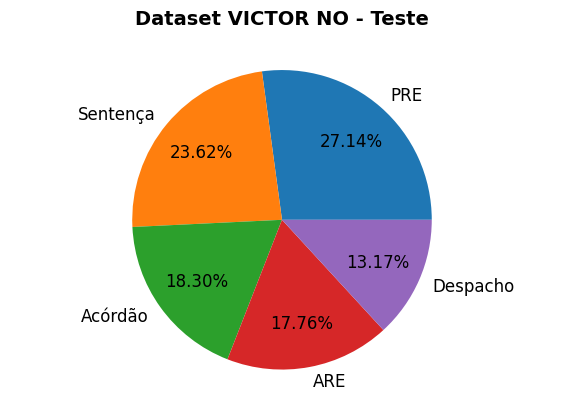

In [ ]:
pie_plot(df_classes_NO.Treino.values,labels,'Dataset VICTOR NO - Treino')
pie_plot(df_classes_NO['Validação'],labels,'Dataset VICTOR NO - Validação')
pie_plot(df_classes_NO.Teste,labels,'Dataset VICTOR NO - Teste')

In [ ]:
#Documentos O10
train_O10_filenames = load_pickle(path=path_dados+'Pre-processados/',filename='filenames_train_O10.pkl')
valid_O10_filenames = load_pickle(path=path_dados+'Pre-processados/',filename='filenames_valid_O10.pkl')

In [ ]:
df_train_O10 = df_train_proc_concat.loc[df_train_proc_concat.file_name.isin(train_O10_filenames)]
df_train_O10 = pd.concat([df_train_O10,df_train_proc_concat.loc[df_train_proc_concat.document_type != 'outros']], ignore_index=True, sort=False)

In [ ]:
df_valid_O10 = df_valid_proc_concat.loc[df_valid_proc_concat.file_name.isin(valid_O10_filenames)]
df_valid_O10 = pd.concat([df_valid_O10,df_valid_proc_concat.loc[df_valid_proc_concat.document_type != 'outros']], ignore_index=True, sort=False)

In [ ]:
df_classes_O10 = generate_df_resume(df_train_O10,df_valid_O10,df_test_proc_concat)
df_classes_O10

,Classe,Treino,Validação,Teste
0,outros,3711,2428,24191
1,peticao_do_RE,450,317,301
2,sentenca,420,277,262
3,acordao_de_2_instancia,301,227,203
4,agravo_em_recurso_extraordinario,266,198,197
5,despacho_de_admissibilidade,265,143,146


In [ ]:
df_classes_O10.Classe

0                              outros
1                       peticao_do_RE
2                            sentenca
3              acordao_de_2_instancia
4    agravo_em_recurso_extraordinario
5         despacho_de_admissibilidade
Name: Classe, dtype: object

In [ ]:
labels = ['Outros','PRE','Sentença','Acórdão','ARE','Despacho']

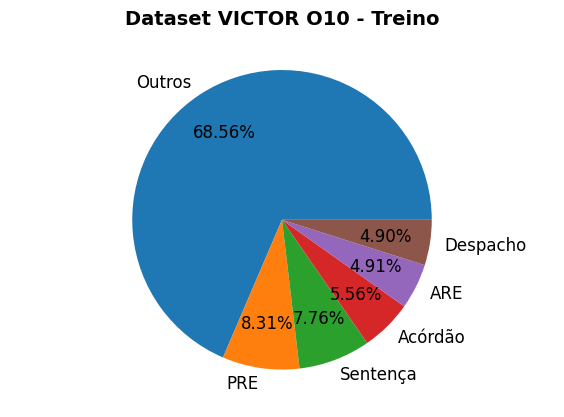

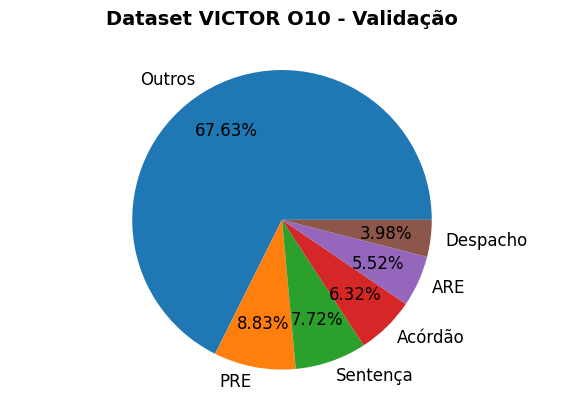

In [ ]:
pie_plot(df_classes_O10.Treino.values,labels,'Dataset VICTOR O10 - Treino')
pie_plot(df_classes_O10['Validação'],labels,'Dataset VICTOR O10 - Validação')
#pie_plot(df_classes_NO.Teste,df_classes_NO.Classe,'Dataset VICTOR NO - Teste')

### Quantidade de Páginas Por Documento

In [ ]:
doc_train_pages = df_train_proc_sem_vazio.groupby(['file_name']).agg({'pages': 'last','document_type': 'last'})
#doc_test_pages = documents_test.groupby(['file_name']).agg({'pages': 'last','document_type': 'last'})

#### Conjunto de Treino

In [ ]:
import matplotlib.ticker as plticker
def kde_plot(data):
  fig, ax = plt.subplots(figsize=(10,5))
  b = sns.kdeplot(data.pages,ax=ax,fill=True)
  b.axes.set_title("Distribuição da quantidade páginas por documento (O100-Treino)",fontsize=16)
  b.set_xlabel("Páginas",fontsize=14)
  b.set_ylabel("Documentos",fontsize=14)
  b.tick_params(labelsize=5)
  loc = plticker.MultipleLocator(base=20)
  ax.xaxis.set_major_locator(loc)
  plt.grid(which='major')
  plt.axvline(data.pages.mean(), color='red', linestyle='--', label='Média de páginas')
  plt.text(4.2,0.15, 'Média: ' + f'{data.pages.mean():.2f}', fontsize = 12)
  plt.yticks(fontsize=12)
  plt.xticks(fontsize=12)

In [ ]:
def box_plot(data,column='Páginas',quantil=0.9,title='',x=1.05,dy=0.3,tipo='Página'):
  fig, ax2 = plt.subplots(figsize=(4,4))
  #a = data.boxplot(column=[column],figsize=(8,8),ax=ax1)
  data = data.rename(columns={'pages':'Páginas'})
  #data = data.rename(columns={'qtd_tokens':tipo})
  b = data.boxplot(column=[tipo],figsize=(3,3),ax=ax2,showfliers=False,)
  #b.set_xlabel(tipo,fontsize=14)
  #b.set_ylabel("Páginas",fontsize=14)
  b.axes.set_title(title,fontsize=12)
  plt.axhline(data[tipo].quantile(quantil), color='red', linestyle='--', label='Quantil 85%')
  plt.text(x,data[tipo].quantile(quantil)-dy, f'Quantil {quantil*100:.0f}%: ' + f'{data[tipo].quantile(quantil):.0f}', fontsize = 12)
  #ax2.xticks(['Páginas'])

In [ ]:
def statistic_sets(qtd_palavras_pre,x,y,tipo='página',base=10,maximo=500,xlabel='Páginas',title=''):
  print("Quantidade de tokens: ",sum(qtd_palavras_pre))
  print("Média de tokens: ", np.mean(qtd_palavras_pre))
  print("Mínimo: ",min(qtd_palavras_pre))
  print("Máximo: ",max(qtd_palavras_pre))
  qtd_palavras_pre.describe()
  fig, ax = plt.subplots(figsize=(10,5))
  qtd = qtd_palavras_pre[qtd_palavras_pre.le(maximo)]
  #b = sns.kdeplot(qtd_palavras_pre,ax=ax,fill=True)
  b = sns.kdeplot(qtd,ax=ax,fill=True)
  b.axes.set_title(title,fontsize=14)
  b.set_xlabel(xlabel,fontsize=12)
  b.set_ylabel("Densidade",fontsize=12)
  b.tick_params(labelsize=5)
  loc = plticker.MultipleLocator(base=base)
  ax.xaxis.major.formatter._useMathText = True
  ax.xaxis.set_major_locator(loc)
  plt.grid(which='major')
  plt.axvline(qtd_palavras_pre.mean(), color='red', linestyle='--', label='Média de ' + f'{xlabel}')
  plt.text(x,y, f'Média: ' + f'{qtd_palavras_pre.mean():.2f}', fontsize = 12)
  plt.yticks(fontsize=12)
  plt.xticks(fontsize=12)

### Qauntidade de páginas por documento

In [ ]:
doc_train_pages.pages.sum()

145304

In [ ]:
doc_train_pages.pages.describe()

count    38815.000000
mean         3.743553
std          9.065922
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max        317.000000
Name: pages, dtype: float64

In [ ]:
doc_train_pages.pages.quantile(0.85)

6.0

Quantidade de tokens:  145304
Média de tokens:  3.743597670943474
Mínimo:  1
Máximo:  317


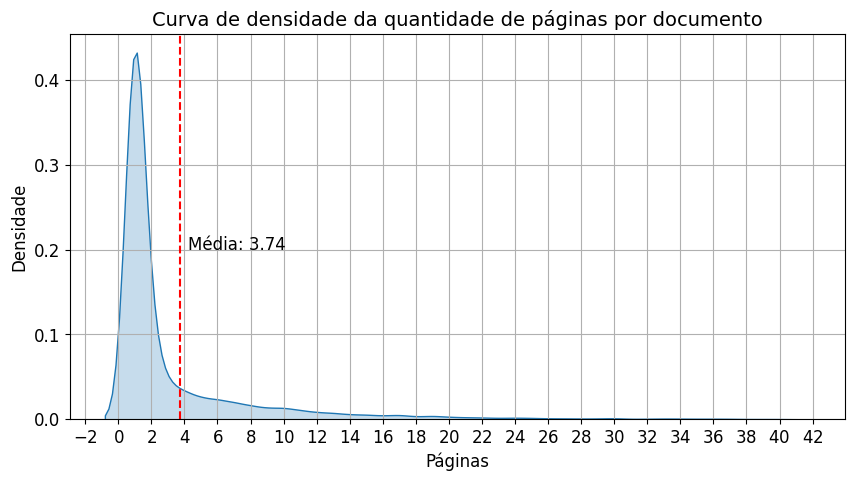

In [ ]:
statistic_sets(doc_train_pages.pages,4.2,0.2,tipo='documento',maximo=40,base=2,title='Curva de densidade da quantidade de páginas por documento')

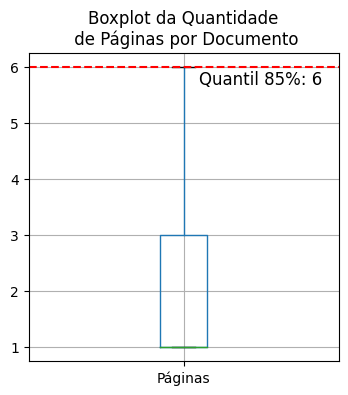

In [ ]:
box_plot(doc_train_pages,quantil=0.85,title="Boxplot da Quantidade\n de Páginas por Documento")

#### Agrupado por Tipo de Documento

In [ ]:
#Para conjunto de treino
doc_train_pages.groupby('document_type').pages.describe()

,count,mean,std,min,25%,50%,75%,max
document_type,,,,,,,,
acordao_de_2_instancia,499.0,1.695391,1.455980,1.0,1.0,1.0,2.0,16.0
agravo_em_recurso_extraordinario,493.0,9.146045,9.712062,1.0,4.0,4.0,10.0,87.0
despacho_de_admissibilidade,408.0,1.281863,0.708991,1.0,1.0,1.0,1.0,9.0
outros,61399.0,3.423785,8.183047,1.0,1.0,1.0,2.0,317.0
peticao_do_RE,767.0,20.397653,12.110658,1.0,11.0,17.0,28.0,100.0
sentenca,697.0,5.304161,3.224707,1.0,3.0,5.0,6.0,28.0


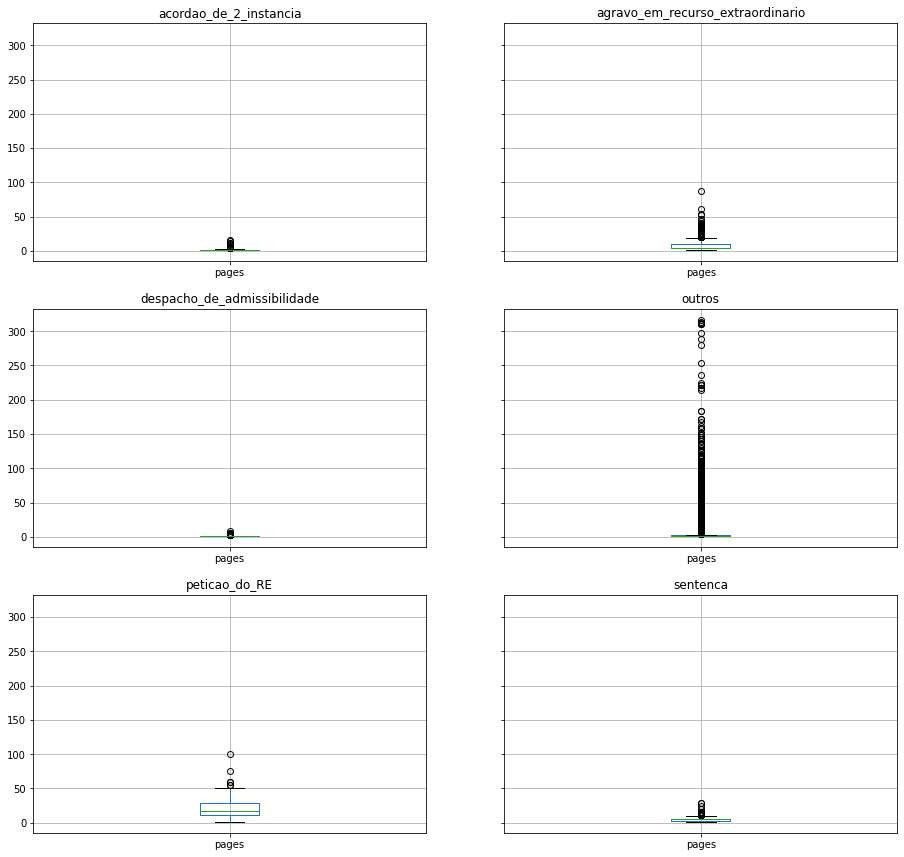

In [ ]:
axes = doc_train_pages.groupby('document_type').boxplot(column=['pages'],figsize=(15,15))

#### Conjunto de Testes

In [ ]:
doc_test_pages.pages.describe()

count    25302.000000
mean         3.578373
std          7.453796
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max        247.000000
Name: pages, dtype: float64

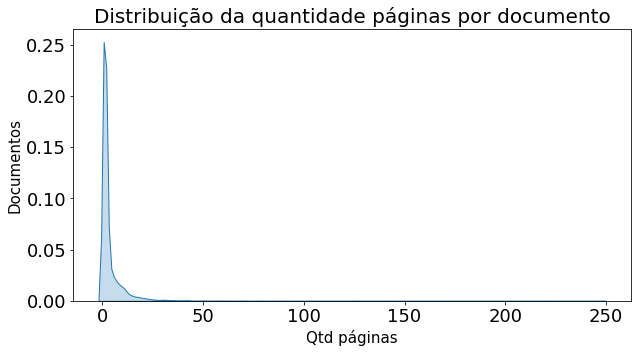

In [ ]:
kde_plot(doc_test_pages)

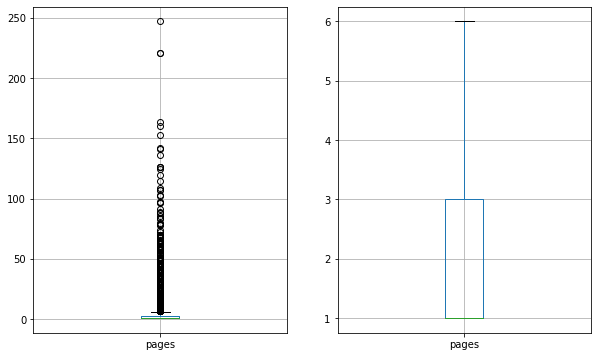

In [ ]:
box_plot(doc_test_pages)

#### Agrupado por Tipo de Documento

In [ ]:
#Média de páginas por tipo de documento no conjuto de Teste
doc_test_pages.groupby('document_type').pages.describe()

,count,mean,std,min,25%,50%,75%,max
document_type,,,,,,,,
acordao_de_2_instancia,197.0,1.375635,0.729142,1.0,1.0,1.0,2.0,5.0
agravo_em_recurso_extraordinario,203.0,8.487685,8.581790,1.0,3.0,4.0,10.0,43.0
despacho_de_admissibilidade,146.0,1.349315,0.929163,1.0,1.0,1.0,1.0,10.0
outros,24193.0,3.338858,7.196137,1.0,1.0,1.0,2.0,247.0
peticao_do_RE,301.0,20.338870,11.780129,2.0,10.0,17.0,27.0,67.0
sentenca,262.0,5.534351,3.201527,1.0,3.0,5.0,7.0,21.0


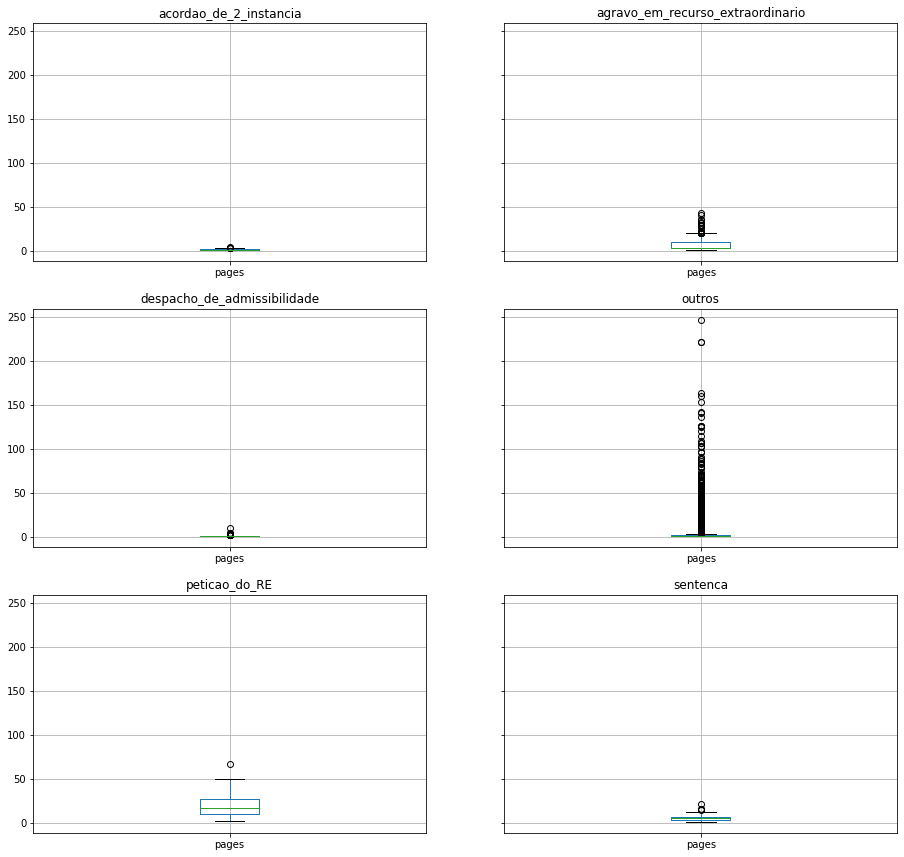

In [ ]:
axes = doc_test_pages.groupby('document_type').boxplot(column=['pages'],figsize=(15,15))

### Quantidade de tokens por página

In [ ]:
df_train_proc_sem_vazio['Token'] = df_train_proc_sem_vazio.body.apply(lambda x: len(str(x).split(' ')))
#documents_test['qtd_token'] = documents_test.body.apply(lambda x: len(str(x).split(' ')))

#### Treino

In [ ]:
df_train_proc_sem_vazio['qtd_token'].sum()

22105103

In [ ]:
df_train_proc_sem_vazio['qtd_token'].describe()

count    149129.000000
mean        148.228064
std          91.848280
min           1.000000
25%          79.000000
50%         144.000000
75%         202.000000
max        2679.000000
Name: qtd_token, dtype: float64

In [ ]:
df_train_proc_sem_vazio['qtd_token'].quantile(0.90)

255.0

In [ ]:
statistic_sets()

Quantidade de tokens:  22105103
Média de tokens:  148.22806429332994
Mínimo:  1
Máximo:  2679


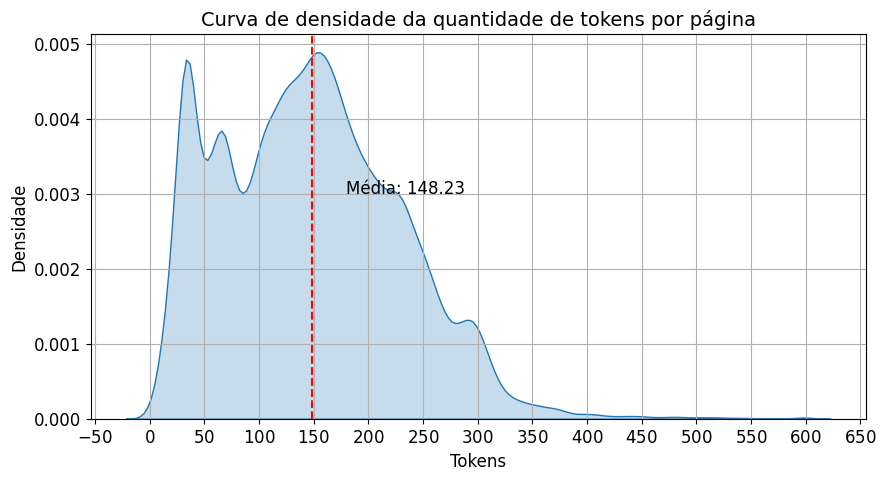

In [ ]:
statistic_sets(df_train_proc_sem_vazio['qtd_token'],180,0.003,tipo='tokens',base=50,maximo=600,xlabel='Tokens',title='Curva de densidade da quantidade de tokens por página')

In [ ]:
df_train_proc_sem_vazio.qtd_token.quantile(0.90)

255.0

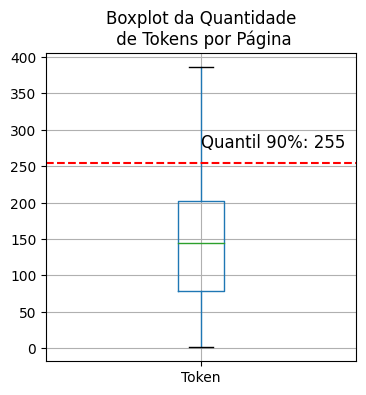

In [ ]:
box_plot(df_train_proc_sem_vazio,column='qtd_token',title='Boxplot da Quantidade\n de Tokens por Página',x=1,dy=-20,tipo='Token')

In [ ]:
documents_train.groupby('document_type').qtd_token.describe()

,count,mean,std,min,25%,50%,75%,max
document_type,,,,,,,,
acordao_de_2_instancia,852.0,243.794601,112.624210,19.0,148.75,258.0,325.0,576.0
agravo_em_recurso_extraordinario,4684.0,193.497011,92.511083,1.0,132.00,180.5,242.0,743.0
despacho_de_admissibilidade,529.0,154.489603,116.691709,12.0,83.00,153.0,180.0,844.0
outros,218109.0,169.843542,106.992860,1.0,84.00,165.0,237.0,3304.0
peticao_do_RE,15869.0,213.126473,87.086777,1.0,165.00,205.0,257.0,781.0
sentenca,3765.0,254.567331,92.431559,11.0,201.00,243.0,324.0,837.0


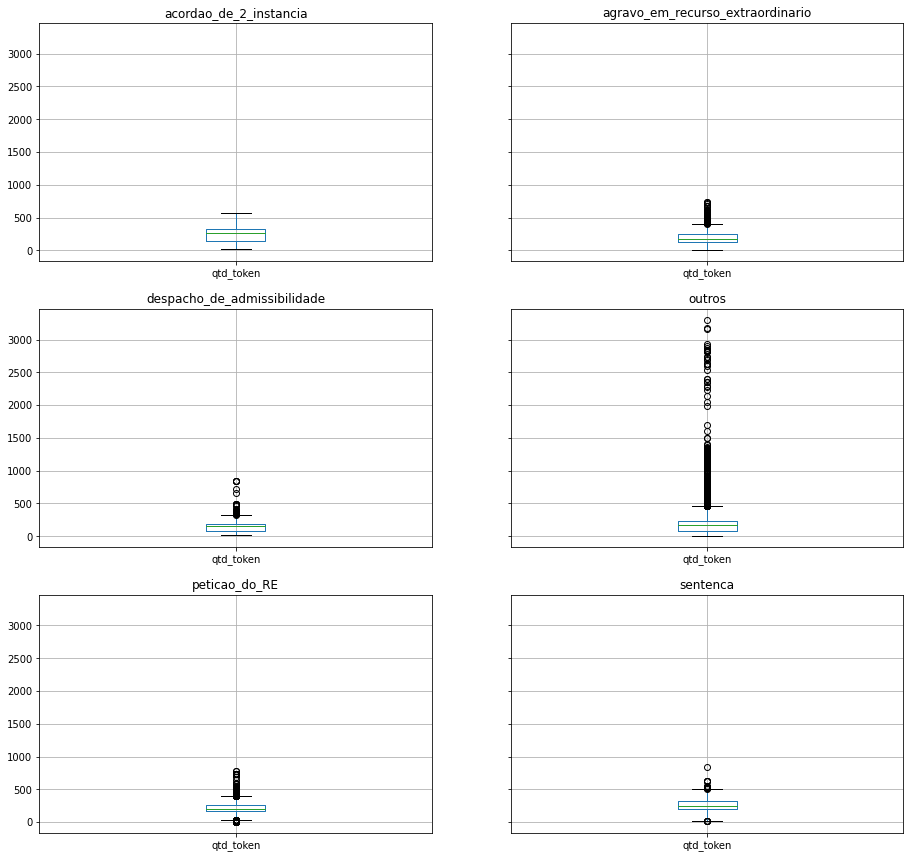

In [ ]:
axes = documents_train.groupby('document_type').boxplot(column=['qtd_token'],figsize=(15,15))

#### Conjunto de Teste

Quantidade de tokens:  16678390
Média de tokens:  174.62819868492693
Mínimo:  1
Máximo:  2865


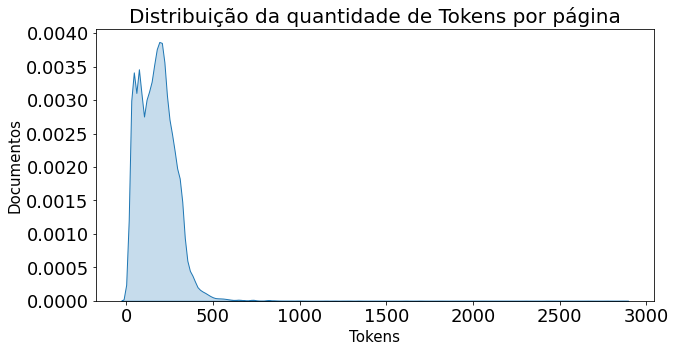

In [ ]:
statistic_sets(documents_test['qtd_token'])

In [ ]:
documents_test.qtd_token.describe()

count    95508.000000
mean       174.628199
std        105.233035
min          1.000000
25%         91.000000
50%        171.000000
75%        239.000000
max       2865.000000
Name: qtd_token, dtype: float64

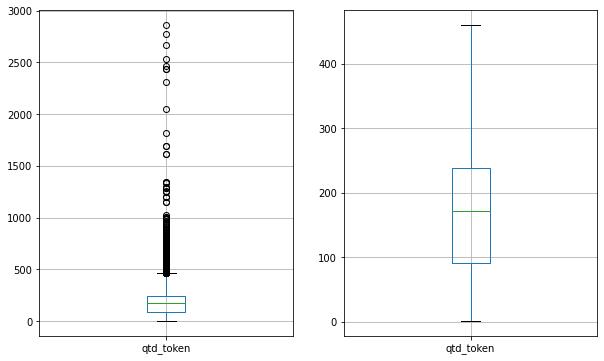

In [ ]:
box_plot(documents_test,'qtd_token')

In [ ]:
documents_test.groupby('document_type').qtd_token.describe()

,count,mean,std,min,25%,50%,75%,max
document_type,,,,,,,,
acordao_de_2_instancia,273.0,266.963370,112.481953,29.0,182.0,272.0,329.0,560.0
agravo_em_recurso_extraordinario,1837.0,197.038106,88.736315,4.0,136.0,182.0,249.0,656.0
despacho_de_admissibilidade,198.0,144.919192,107.568481,12.0,53.0,130.5,195.0,793.0
outros,85394.0,169.588519,105.500680,1.0,83.0,164.0,234.0,2865.0
peticao_do_RE,6331.0,214.684884,88.976540,5.0,166.0,208.0,262.0,729.0
sentenca,1475.0,253.453559,90.144929,14.0,206.0,238.0,319.5,627.0


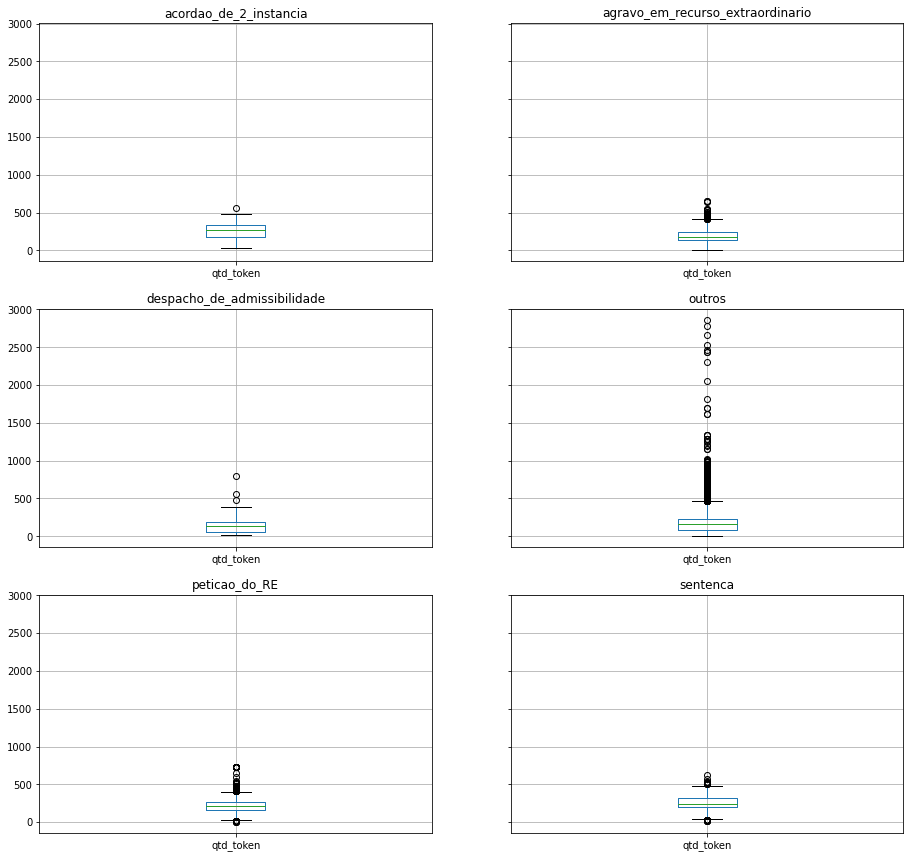

In [ ]:
axes = documents_test.groupby('document_type').boxplot(column=['qtd_token'],figsize=(15,15))

### Quantidade de Tokens por Documento

In [ ]:
#Caregando os dados de treino e validação com as páginas concatenadas
documents_train = load_pickle(path=path_dados+path_preprocessados,filename='train_processed_concat_pages.pkl')
#documents_test = load_pickle(path=path_dados+path_preprocessados,filename='test_processed_concat_pages.pkl')

In [ ]:
documents_train['Token'] = documents_train.body.apply(lambda x: len(str(x).split(' ')))
#documents_test['qtd_token'] = documents_test.body.apply(lambda x: len(str(x).split(' ')))

In [ ]:
documents_train['Token'].describe()

count    38814.000000
mean       569.513655
std       2083.609189
min          1.000000
25%         53.000000
50%        105.000000
75%        364.000000
max      93399.000000
Name: Token, dtype: float64

#### Treino

Quantidade de tokens:  22105103
Média de tokens:  569.5136548668006
Mínimo:  1
Máximo:  93399


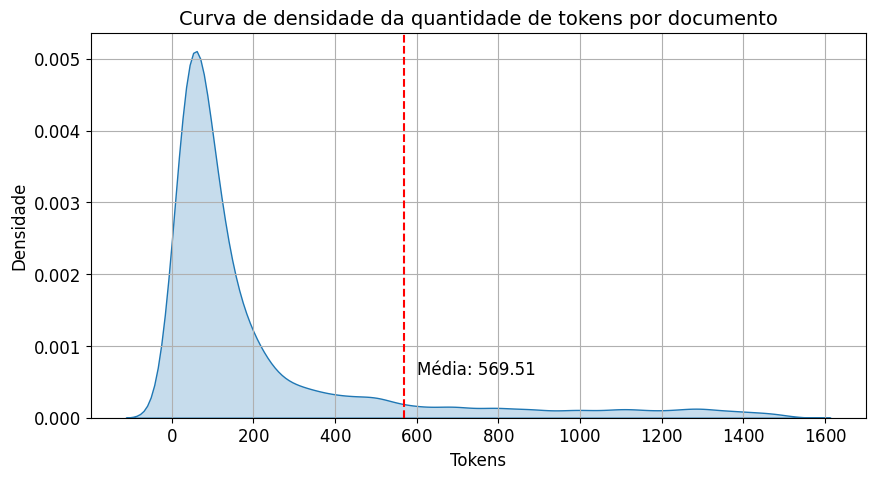

In [ ]:
statistic_sets(documents_train['Token'], x=600,y=0.0006, tipo='documento', base=200,maximo=1500,xlabel='Tokens',title='Curva de densidade da quantidade de tokens por documento')

In [ ]:
documents_train.Token.quantile(0.90)

1486.0

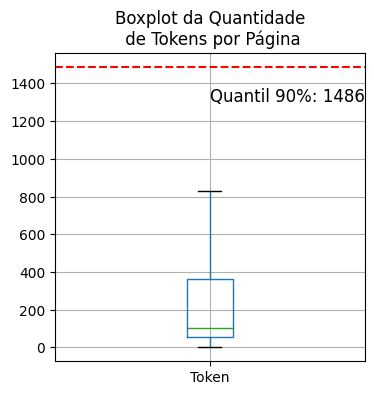

In [ ]:
box_plot(documents_train,column='qtd_token',title='Boxplot da Quantidade\n de Tokens por Página',x=1,dy=180,tipo='Token')

Proposta:
1530 tokens por documento, no máximo.

No caso do Mecanismo de Atenção : 6 páginas (85% dos documentos tem até 6
 páginas), com no máximo 255 tokens (90% das páginas tem até esse valor)

In [ ]:
def box_plot(data,column='Páginas',quantil=0.9,title=''):
  fig, ax2 = plt.subplots(figsize=(6,6))
  #a = data.boxplot(column=[column],figsize=(8,8),ax=ax1)
  data = data.rename(columns={'pages':'Páginas'})
  b = data.boxplot(column=[column],figsize=(8,8),ax=ax2,showfliers=False)
  #b.set_xlabel("Documentos",fontsize=14)
  #b.set_ylabel("Páginas",fontsize=14)
  b.axes.set_title(title,fontsize=14)
  plt.axhline(data[column].quantile(quantil), color='red', linestyle='--', label='Quantil 85%')
  plt.text(1.1,data[column].quantile(quantil)-70, 'Quantil 90%: ' + f'{data[column].quantile(quantil):.0f}', fontsize = 12)
  #ax2.xticks(['Páginas'])

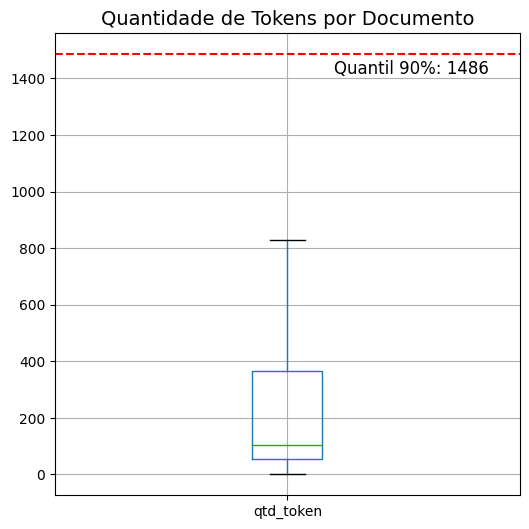

In [ ]:
box_plot(documents_train,'qtd_token',title='Quantidade de Tokens por Documento',quantil=0.9)

In [ ]:
documents_train.groupby('document_type').qtd_token.describe()

,count,mean,std,min,25%,50%,75%,max
document_type,,,,,,,,
acordao_de_2_instancia,499.0,416.258517,302.077292,94.0,246.0,361.0,542.0,3438.0
agravo_em_recurso_extraordinario,493.0,1838.417850,2047.717907,6.0,643.0,895.0,2010.0,13020.0
despacho_de_admissibilidade,408.0,200.306373,231.203032,12.0,89.0,159.0,248.0,2220.0
outros,61399.0,603.338898,2061.886954,1.0,60.0,111.0,354.5,95477.0
peticao_do_RE,767.0,4409.522816,3078.555554,21.0,2236.0,3424.0,6384.0,22656.0
sentenca,697.0,1375.101865,987.609018,96.0,713.0,1246.0,1750.0,13388.0


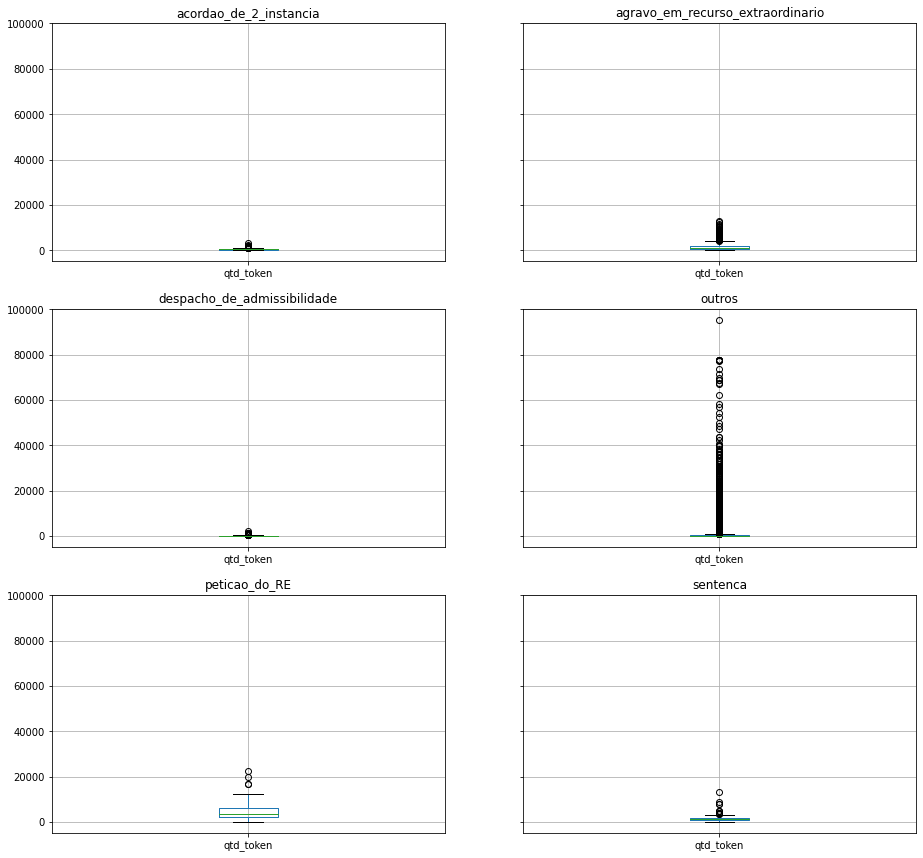

In [ ]:
axes = documents_train.groupby('document_type').boxplot(column=['qtd_token'],figsize=(15,15))

##### Considerando apenas os documentos que possuem uma página

In [ ]:
documents_train.loc[documents_train.pages == 1].qtd_token.describe()

count    40768.000000
mean        91.264399
std         93.742519
min          1.000000
25%         43.000000
50%         74.000000
75%        113.000000
max       5454.000000
Name: qtd_token, dtype: float64

#### Conjunto de Testes

Quantidade de tokens:  16678390
Média de tokens:  659.1727926646115
Mínimo:  2
Máximo:  78076


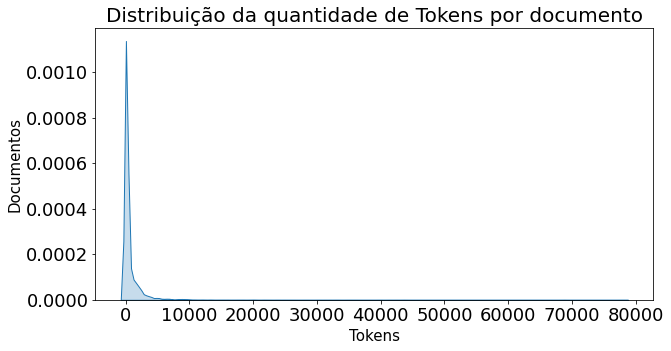

In [ ]:
statistic_sets(documents_test['qtd_token'], tipo = 'documento')

In [ ]:
documents_test.qtd_token.describe()

count    25302.000000
mean       659.172793
std       1875.860953
min          2.000000
25%         62.000000
50%        116.000000
75%        431.000000
max      78076.000000
Name: qtd_token, dtype: float64

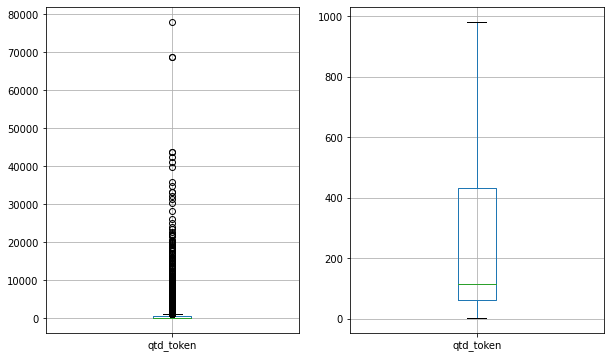

In [ ]:
box_plot(documents_test,'qtd_token')

In [ ]:
documents_test.groupby('document_type').qtd_token.describe()

,count,mean,std,min,25%,50%,75%,max
document_type,,,,,,,,
acordao_de_2_instancia,197.0,369.954315,181.185137,94.0,246.0,328.0,431.0,1034.0
agravo_em_recurso_extraordinario,203.0,1783.049261,2184.679734,85.0,613.0,890.0,2051.5,17244.0
despacho_de_admissibilidade,146.0,196.534247,250.512307,12.0,53.0,152.0,274.0,2283.0
outros,24193.0,598.596371,1816.174666,2.0,60.0,111.0,368.0,78076.0
peticao_do_RE,301.0,4515.514950,3137.486879,347.0,2114.0,3632.0,6578.0,20008.0
sentenca,262.0,1426.885496,1030.280906,123.0,713.0,1309.5,2001.0,13256.0


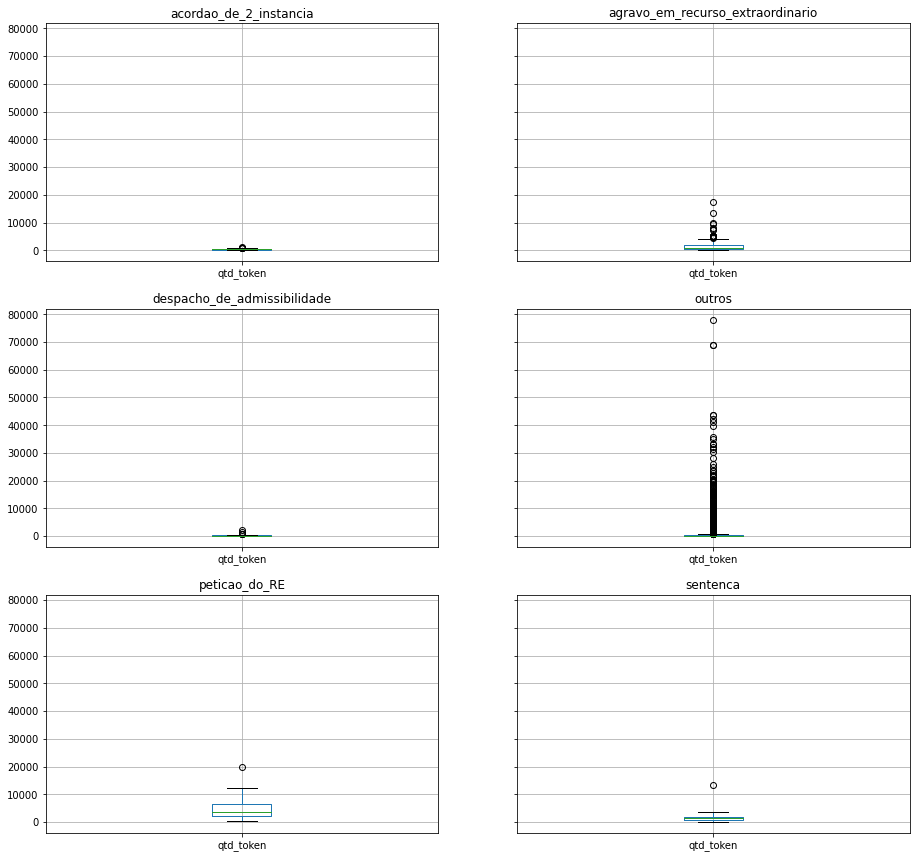

In [ ]:
axes = documents_test.groupby('document_type').boxplot(column=['qtd_token'],figsize=(15,15))

## Quantidade de Documentos por classe

In [ ]:
documents_count = documents_test['document_type'].value_counts()
documents_count

outros                              24193
peticao_do_RE                         301
sentenca                              262
agravo_em_recurso_extraordinario      203
acordao_de_2_instancia                197
despacho_de_admissibilidade           146
Name: document_type, dtype: int64

In [ ]:
documents_count/sum(documents_count)

outros                              0.956169
peticao_do_RE                       0.011896
sentenca                            0.010355
agravo_em_recurso_extraordinario    0.008023
acordao_de_2_instancia              0.007786
despacho_de_admissibilidade         0.005770
Name: document_type, dtype: float64

# Procedimento para Remoção de Outliers (Página, Token, Documento)

In [ ]:
def calcula_IQR(data,column):
  Q1 = data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)
  IQR = Q3 - Q1
  removidos = data[(data[column]<(Q1-1.5*IQR)) | (data[column] > (Q3 + 1.5*IQR))]
  mantidos = data[~((data[column]<(Q1-1.5*IQR)) | (data[column] > (Q3 + 1.5*IQR)))]
  print('Documentos da coluna ' + column + ' mantidos: ' + str(len(mantidos)))
  print('Documentos da coluna ' + column + ' removidos: ' + str(len(removidos)))
  return IQR,Q3,Q1,removidos,mantidos

In [ ]:
#IQRs Treino
IQR_pagina_train,Q3_pagina_train,Q1_pagina_train,_,_ = calcula_IQR(documents_train,'pages')
IQR_token_train,Q3_token_train,Q1_token_train,_,_ = calcula_IQR(documents_train,'qtd_token')
print("IQR por página do conjunto de treino: ", IQR_pagina_train)
print("IQR por quantidade de token do conjunto de treino: ", IQR_token_train)

Documentos da coluna pages mantidos: 54904
Documentos da coluna pages removidos: 9359
Documentos da coluna qtd_token mantidos: 53417
Documentos da coluna qtd_token removidos: 10846
IQR por página do conjunto de treino:  2.0
IQR por quantidade de token do conjunto de treino:  361.0


In [ ]:
#IQRs Teste
IQR_pagina_test,Q3_pagina_test,Q1_pagina_test,_,_ = calcula_IQR(documents_test,'pages')
IQR_token_test,Q3_token_test,Q1_token_test,_,_ = calcula_IQR(documents_test,'qtd_token')
print("IQR por página do conjunto de treino: ", IQR_pagina_train)
print("IQR por quantidade de token do conjunto de treino: ", IQR_token_train)

Documentos da coluna pages mantidos: 21672
Documentos da coluna pages removidos: 3630
Documentos da coluna qtd_token mantidos: 21000
Documentos da coluna qtd_token removidos: 4302
IQR por página do conjunto de treino:  2.0
IQR por quantidade de token do conjunto de treino:  361.0


## Cálculos considerando a classe do documento

In [ ]:
def calcula_IQR_classe(data,column):
  types = data.document_type.unique()
  df_iqr = data.groupby('document_type')[column].describe()
  idx_removidos = []
  cnt_removidos = []
  pct_removidos = []
  for document_type in types:
    Q1 = df_iqr.loc[document_type]['25%']
    Q3 = df_iqr.loc[document_type]['75%']
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5*IQR
    lim_sup = Q3 + 1.5*IQR
    df_iqr.loc[document_type]['lim_inf'] = lim_inf
    df_iqr.loc[document_type]['lim_sup'] = lim_sup
    df_type =  data.loc[data.document_type==document_type]
    idx_removidos.append(df_type[((df_type[column]<(Q1-1.5*IQR)) | (df_type[column] > (Q3 + 1.5*IQR)))].index)
    qtd = len(df_type[((df_type[column]<(Q1-1.5*IQR)) | (df_type[column] > (Q3 + 1.5*IQR)))].index)
    cnt_removidos.append(qtd)
    pct_removidos.append(qtd/df_iqr.loc[document_type]['count'])
  df_removidos = pd.DataFrame({'document_type':types,'removidos':idx_removidos,'qtd':cnt_removidos,'pct':["{:.3%}".format(item) for item in pct_removidos]})
  return df_iqr,df_removidos

### TREINO



In [ ]:
#por Página
iqr,removidos = calcula_IQR_classe(documents_train,'pages')
removidos

,document_type,removidos,qtd,pct
0,outros,"Int64Index([ 3, 8, 9, 10, 13,...",12867,20.956%
1,peticao_do_RE,"Int64Index([4430, 4431, 4540, 15590, 23934, 26...",6,0.782%
2,sentenca,"Int64Index([ 1785, 8006, 11592, 18989, 23545,...",38,5.452%
3,despacho_de_admissibilidade,"Int64Index([ 83, 2591, 5850, 5851, 9188,...",86,21.078%
4,acordao_de_2_instancia,"Int64Index([ 1724, 4080, 23193, 23220, 27711,...",28,5.611%
5,agravo_em_recurso_extraordinario,"Int64Index([ 370, 420, 458, 793, 1092,...",66,13.387%


In [ ]:
#por quantidade de Token
iqr,removidos = calcula_IQR_classe(documents_train,'qtd_token')
removidos

,document_type,removidos,qtd,pct
0,outros,"Int64Index([ 3, 8, 9, 10, 13,...",10423,16.976%
1,peticao_do_RE,"Int64Index([4430, 4431, 4540, 8019], dtype='in...",4,0.522%
2,sentenca,"Int64Index([ 1785, 8006, 11592, 14627, 18989,...",12,1.722%
3,despacho_de_admissibilidade,"Int64Index([ 9631, 26529, 33222, 33395, 37590,...",27,6.618%
4,acordao_de_2_instancia,"Int64Index([ 4080, 23193, 23220, 27711, 33292,...",16,3.206%
5,agravo_em_recurso_extraordinario,"Int64Index([ 793, 1092, 2736, 3006, 4624,...",48,9.736%


### TESTE

In [ ]:
#por Página
iqr,removidos = calcula_IQR_classe(documents_test,'pages')
removidos

,document_type,removidos,qtd,pct
0,outros,"Int64Index([ 2, 14, 20, 23, 24,...",4977,20.572%
1,despacho_de_admissibilidade,"Int64Index([ 5, 2918, 5545, 5582, 7538,...",35,23.973%
2,sentenca,"Int64Index([4503, 12060, 13622, 19550], dtype=...",4,1.527%
3,agravo_em_recurso_extraordinario,"Int64Index([ 124, 170, 205, 240, 1608,...",22,10.837%
4,peticao_do_RE,"Int64Index([11749], dtype='int64')",1,0.332%
5,acordao_de_2_instancia,"Int64Index([2903, 16820, 18452, 18471, 18486],...",5,2.538%


In [ ]:
#por quantidade de Token
iqr,removidos = calcula_IQR_classe(documents_test,'qtd_token')
removidos

,document_type,removidos,qtd,pct
0,outros,"Int64Index([ 2, 20, 23, 24, 25,...",4080,16.864%
1,despacho_de_admissibilidade,"Int64Index([5582, 7538, 7566, 7664, 21277, 214...",6,4.110%
2,sentenca,"Int64Index([4503], dtype='int64')",1,0.382%
3,agravo_em_recurso_extraordinario,"Int64Index([ 1608, 2141, 2591, 2653, 2715,...",18,8.867%
4,peticao_do_RE,"Int64Index([6497], dtype='int64')",1,0.332%
5,acordao_de_2_instancia,"Int64Index([2903, 16820, 16882, 20472, 21074],...",5,2.538%


# Procedimento para amostragem do dataset em relação à classe 'outros'

Os dados serão divididos em 25%, 50%, 75% e 100% da classe outros.

In [ ]:
#carregando o dataset completo para treino e validação
documents_train = load_pickle(path=path_dados+path_preprocessados,filename='train_processed_concat_pages.pkl')
documents_test = load_pickle(path=path_dados+path_preprocessados,filename='test_processed_concat_pages.pkl')

NameError: ignored

In [ ]:
len(documents_train),len(documents_test)

In [ ]:
def get_under_outros(data,frac,random_state=42):
  df = data.loc[data['document_type'] == 'outros']
  df_demais = data.loc[data['document_type'] != 'outros'].file_name
  df = df['file_name'].sample(frac = frac,replace=False, random_state=random_state)
  df_demais = pd.concat([df,df_demais])
  return df_demais

In [ ]:
for i in ['0.25', '0.50', '0.75']:
  os = get_under_outros(data=documents_test,frac = float(i))
  save_pickle(os,path=path_dados+path_preprocessados,filename=f'index_test_concat_pages_OS{str(i).split(".")[1]}.pkl')